In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import shuffle
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
train_data = pd.read_csv("train_PDjVQMB.csv")
test_data = pd.read_csv("test_lTY72QC.csv")


In [3]:
train_data['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [4]:
train_id= train_data['ID']
test_id= test_data['ID']
target_data = train_data['Is_Churn']
train_data = train_data.drop(['Is_Churn'],axis=1)

In [5]:
train_data['t']=1
test_data['t']=0

In [6]:
data=pd.DataFrame()
data=train_data.append(test_data)
df =data

In [7]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,t
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,1
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor,0
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average,0
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor,0
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor,0


In [8]:
#sns.distplot(df["Balance"])

In [9]:
#sns.boxplot(df['Balance'])

In [10]:
percentile25 = df['Balance'].quantile(0.25)
percentile75 = df['Balance'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

df[df['Balance'] > upper_limit]
df[df['Balance'] < lower_limit]

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,t


In [11]:
new_df = df[df['Balance'] < upper_limit]
new_df.shape

(9446, 11)

In [12]:
new_df_cap = df.copy()
new_df_cap['Balance'] = np.where(
    new_df_cap['Balance'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Balance'] < lower_limit,
        lower_limit,
        new_df_cap['Balance']
    )
)

C:\Users\Adamya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Adamya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Adamya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


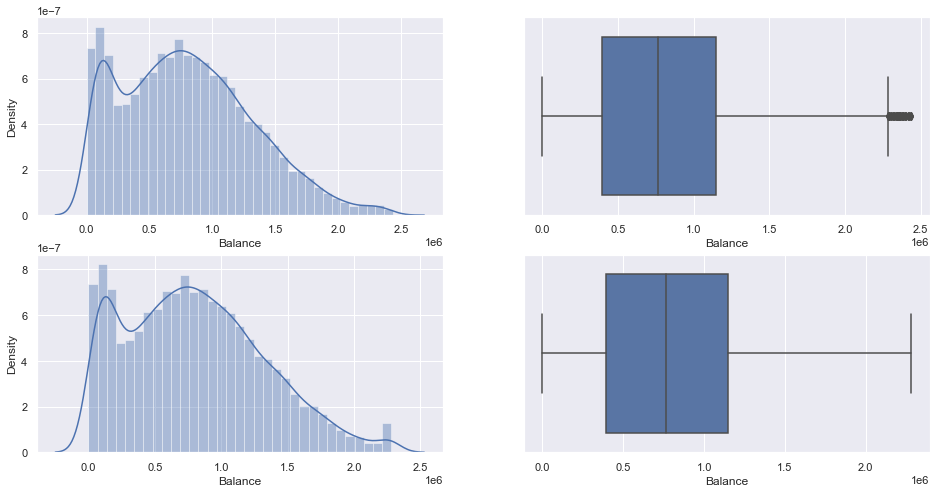

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Balance'])
plt.subplot(2,2,2)
sns.boxplot(df['Balance'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Balance'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Balance'])
plt.show()

In [14]:
df['Balance'] = new_df_cap['Balance']


In [15]:
#sns.distplot(df["Age"])



In [16]:
df.loc[df['Age']<=30, 'age_group'] = 'vyadult'
df.loc[df['Age'].between(31,40), 'age_group'] = 'yadult'
df.loc[df['Age'].between(41,50), 'age_group'] = 'adult'
df.loc[df['Age'].between(51,60), 'age_group'] = 'oadult'
df.loc[df['Age']>=61, 'age_group'] = 'voadult'

In [19]:
df['balance']=pd.cut(df.Balance,bins=4,labels=False)

In [20]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,t,age_group,balance
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,yadult,0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,1,oadult,1
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,1,yadult,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,adult,2
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,yadult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor,0,yadult,2
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average,0,adult,2
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor,0,oadult,1
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor,0,yadult,2


In [26]:
df

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,t,age_group,balance
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,yadult,0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,1,oadult,1
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,1,yadult,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,adult,2
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,yadult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor,0,yadult,2
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average,0,adult,2
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor,0,oadult,1
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor,0,yadult,2


In [28]:
df  = pd.get_dummies(df,columns = ['Income','balance','Vintage','Product_Holdings','age_group','Gender'], drop_first= True )

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9501 entries, 0 to 2850
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    9501 non-null   object 
 1   Age                   9501 non-null   int64  
 2   Balance               9501 non-null   float64
 3   Transaction_Status    9501 non-null   int64  
 4   Credit_Card           9501 non-null   int64  
 5   Credit_Category       9501 non-null   object 
 6   t                     9501 non-null   int64  
 7   Income_5L - 10L       9501 non-null   uint8  
 8   Income_Less than 5L   9501 non-null   uint8  
 9   Income_More than 15L  9501 non-null   uint8  
 10  balance_1             9501 non-null   uint8  
 11  balance_2             9501 non-null   uint8  
 12  balance_3             9501 non-null   uint8  
 13  Vintage_1             9501 non-null   uint8  
 14  Vintage_2             9501 non-null   uint8  
 15  Vintage_3            

In [33]:
df_final=df.drop(columns=['Age','ID','Balance','Credit_Category','Credit_Card','Income_5L - 10L','Income_Less than 5L','Transaction_Status'])

In [35]:
df_final

,t,Income_More than 15L,balance_1,balance_2,balance_3,Vintage_1,Vintage_2,Vintage_3,Vintage_4,Vintage_5,Product_Holdings_2,Product_Holdings_3+,age_group_oadult,age_group_voadult,age_group_vyadult,age_group_yadult,Gender_Male
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2847,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2848,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2849,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [36]:
#seprating test and train
train = df_final[df_final['t'] == 1]
test = df_final[df_final['t'] == 0]

In [37]:
#dropping 0 and 1 from 
train= train.drop(["t"], axis=1)
test= test.drop(["t"], axis=1)

In [38]:
#train.columns

In [39]:
target = target_data
features = [x for x in list(train.columns)]

In [40]:
from sklearn.preprocessing import MinMaxScaler


#train = shuffle(train)
#test = shuffle(test)

minmax = MinMaxScaler()
train = minmax.fit_transform(train)
#train_normalized = pd.DataFrame(train, columns=features)

#print(train)

test = minmax.fit_transform(test)
#test_normalized = pd.DataFrame(test, columns=features)

#print(test)

In [41]:
X=train
y=target_data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33,stratify=y)

## SMOTE Oversampling technique for imbalance dataset


In [43]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_Smote, y_train_Smote = smt.fit_resample(X_train, y_train)
X_train.shape, y_train.shape
#Shape of X_train & y_train


((4987, 16), (4987,))

In [44]:
#oversampled for minority class
X_train_Smote.shape, y_train_Smote.shape
#Shape of X_train of SMOTE and y_train of SMOTE

((7668, 16), (7668,))

## Logistic Regression (with smote)

In [45]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix
logreg=LogisticRegression()
logreg.fit(X_train_Smote, y_train_Smote)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))
from sklearn.metrics import f1_score
f1_score(y_test,prediction_logreg, average='macro')

0.5802766085387854


0.5405510028308519

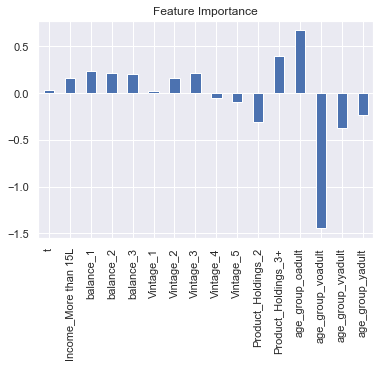

In [46]:
feature_dict_logreg=dict(zip(df_final.columns,list(logreg.coef_[0])))
#feature_dict_logreg
feature_df_logreg=pd.DataFrame(feature_dict_logreg,index=[0])
feature_df_logreg.T.plot(kind="bar",legend=False,title="Feature Importance")

## GaussianNaive Bayes

In [47]:
gnb_model1=GaussianNB()
gnb_model1.fit(X_train_Smote, y_train_Smote)
prediction_gnb_smote = gnb_model1.predict(X_test)
#print(accuracy_score(y_test, prediction_gnb_smote))

In [48]:
#f1_score(y_test,prediction_gnb_smote, average='macro')
#classification Report 
gnb_clf = classification_report(y_test, prediction_gnb_smote)
print(gnb_clf)
# Create the Confusion matrix
#plot_confusion_matrix(gnb_model1, 
 #                     X_test, 
  #                    y_test,
   #                   display_labels=['Not_Churn', 'Churn']);

              precision    recall  f1-score   support

           0       0.84      0.40      0.54      1279
           1       0.27      0.75      0.40       384

    accuracy                           0.48      1663
   macro avg       0.56      0.58      0.47      1663
weighted avg       0.71      0.48      0.51      1663



In [49]:
f1_score(y_test,prediction_gnb_smote, average='macro')

0.4725191776143832

In [50]:
gnb_model=GaussianNB(var_smoothing=2e-9)
gnb_model.fit(X_train, y_train)
prediction_gnb = gnb_model.predict(X_test)
print(accuracy_score(y_test, prediction_gnb))

0.7137702946482261


In [51]:
#f1_score(y_test,prediction_gnb, average='macro')
#classification Report 
gnb_clf = classification_report(y_test, prediction_gnb)
print(gnb_clf)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1279
           1       0.37      0.34      0.35       384

    accuracy                           0.71      1663
   macro avg       0.59      0.58      0.58      1663
weighted avg       0.71      0.71      0.71      1663



## Complement Naive Bayes

In [52]:
from sklearn.naive_bayes import ComplementNB
 
cnb_model=ComplementNB(norm = True,alpha =1)   
cnb_model.fit(X_train, y_train)
prediction_cnb = cnb_model.predict(X_test)
print(accuracy_score(y_test, prediction_cnb))

0.7041491280817799


In [53]:
#f1_score(y_test,prediction_gnb, average='macro')
#classification Report 
cnb_clf = classification_report(y_test, prediction_cnb)
print(cnb_clf)

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1279
           1       0.37      0.42      0.39       384

    accuracy                           0.70      1663
   macro avg       0.60      0.60      0.60      1663
weighted avg       0.72      0.70      0.71      1663



In [54]:
f1_score(y_test,prediction_cnb, average='macro')

0.5991923063357513

In [55]:
pred_cnb = cnb_model.predict(test)
final_cnb=pd.DataFrame(pred_cnb)

In [56]:
target= pd.DataFrame()
target['Is_Churn'] = target_data
target.head(5)
final_cnb.columns=target.columns
final_cnb['ID']=test_id
#export_csv = final_cnb.to_csv (r'final_cnb.csv', index = None, header=True)

In [57]:
final_cnb.Is_Churn.value_counts()


0    2125
1     726
Name: Is_Churn, dtype: int64

C:\Users\Adamya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


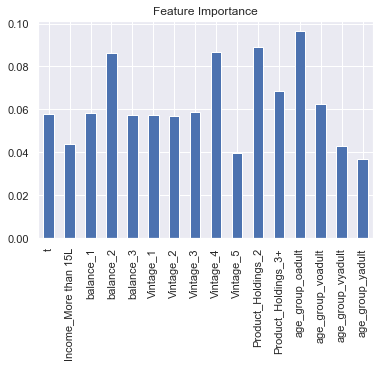

In [58]:
feature_dict_cnb_model=dict(zip(df_final.columns,list(cnb_model.coef_[0])))
#feature_dict_logreg
feature_df_cnb_model=pd.DataFrame(feature_dict_cnb_model,index=[0])
feature_df_cnb_model.T.plot(kind="bar",legend=False,title="Feature Importance")

## XGBoost (with smote)


In [59]:
from xgboost import XGBClassifier
import numpy as np
xgb_smote_model = XGBClassifier(use_label_encoder=False,objective='binary:logistic'
)
xgb_smote_model.fit(X_train_Smote, y_train_Smote, early_stopping_rounds=20,eval_set=[(X_test, y_test)],eval_metric='auc'
)
prediction_xgb_smote = xgb_smote_model.predict(X_test)
#print(accuracy_score(y_test, prediction_xgb))

[0]	validation_0-auc:0.62105
[1]	validation_0-auc:0.63084
[2]	validation_0-auc:0.63065
[3]	validation_0-auc:0.63102
[4]	validation_0-auc:0.62990
[5]	validation_0-auc:0.62748
[6]	validation_0-auc:0.62911
[7]	validation_0-auc:0.62511
[8]	validation_0-auc:0.62422
[9]	validation_0-auc:0.62137
[10]	validation_0-auc:0.62359
[11]	validation_0-auc:0.62306
[12]	validation_0-auc:0.62349
[13]	validation_0-auc:0.62448
[14]	validation_0-auc:0.62296
[15]	validation_0-auc:0.61889
[16]	validation_0-auc:0.61776
[17]	validation_0-auc:0.61509
[18]	validation_0-auc:0.61290
[19]	validation_0-auc:0.61162
[20]	validation_0-auc:0.60869
[21]	validation_0-auc:0.60752
[22]	validation_0-auc:0.60516
[23]	validation_0-auc:0.60516


xgb accuracy score with Smote: 60.012026458208055
              precision    recall  f1-score   support

           0       0.84      0.60      0.70      1279
           1       0.31      0.61      0.42       384

    accuracy                           0.60      1663
   macro avg       0.58      0.61      0.56      1663
weighted avg       0.72      0.60      0.63      1663



C:\Users\Adamya\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


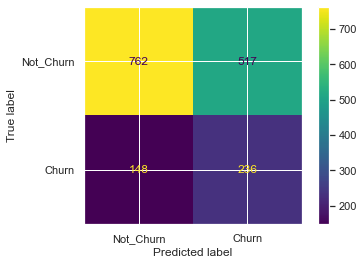

In [60]:
#f1_score(y_test,prediction_xgb, average='macro')
xgb_smote_Accuracy = (prediction_xgb_smote == y_test).sum().astype(float) / len(prediction_xgb_smote)*100
print('xgb accuracy score with Smote:',xgb_smote_Accuracy)
# Create the Confusion matrix
plot_confusion_matrix(xgb_smote_model, 
                      X_test, 
                      y_test,
                      display_labels=['Not_Churn', 'Churn']);

# classification Report
xgb_smote_clf_S = classification_report(y_test, prediction_xgb_smote)
print(xgb_smote_clf_S)

In [61]:
f1_score(y_test,prediction_xgb_smote, average='macro')

0.5556679214413798

In [63]:
predictionf_xgb_smote = xgb_smote_model.predict(test)
#pred_gnb = prediction_xgb_smote.predict(test)
final_xgb_smote=pd.DataFrame(predictionf_xgb_smote)

In [64]:
target= pd.DataFrame()
target['Is_Churn'] = target_data
target.head(5)

,Is_Churn
0,1
1,0
2,0
3,1
4,1


In [65]:
final_xgb_smote.columns=target.columns
final_xgb_smote['ID']=test_id

In [66]:
final_xgb_smote.head(5)

,Is_Churn,ID
0,1,55480787
1,0,9aededf2
2,0,a5034a09
3,1,b3256702
4,0,dc28adb5


In [67]:
final_xgb_smote.Is_Churn.value_counts()


0    1574
1    1277
Name: Is_Churn, dtype: int64

In [68]:
export_csv = final_xgb_smote.to_csv (r'xgb_smote.csv', index = None, header=True)

## XGBoost 


In [ ]:
from xgboost import XGBClassifier
import numpy as np
xgb_model = XGBClassifier(use_label_encoder=False,objective='binary:logistic')
xgb_model.fit(X_train, y_train, early_stopping_rounds=20,eval_set=[(X_test, y_test)],eval_metric='aucpr'
)
prediction_xgb = xgb_model.predict(X_test)
#print(accuracy_score(y_test, prediction_xgb))

In [ ]:
#f1_score(y_test,prediction_xgb, average='macro')
xgb_Accuracy = (prediction_xgb == y_test).sum().astype(float) / len(prediction_xgb)*100
print('xgb accuracy score with Smote:',xgb_Accuracy)
# Create the Confusion matrix
plot_confusion_matrix(xgb_model, 
                      X_test, 
                      y_test,
                      display_labels=['Not_Churn', 'Churn']);

# classification Report
xgb_clf_S = classification_report(y_test, prediction_xgb)
print(xgb_clf_S)